<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-22 04:30:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-05-22 04:30:49 (10.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

Let's clean the data by deleting the first two unnamed columns

In [5]:
df = df.iloc[:, 2:]

df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 8)

Let's check for NaN values

In [7]:
df.isna().sum()

# Great! No NaN values

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [10]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

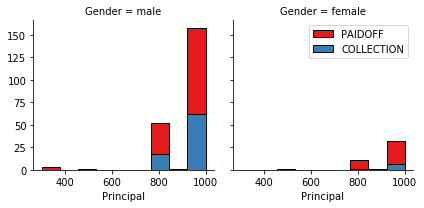

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

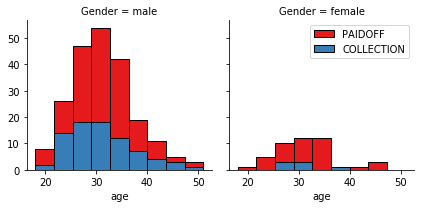

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

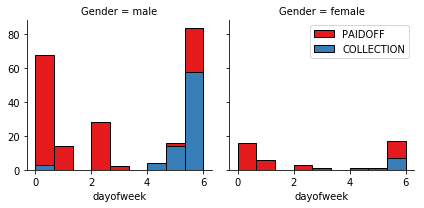

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [14]:
df.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [21]:
Feature.drop(['Master or Above'], axis = 1,inplace=True)  # This is because exactly 50% of 'masters or above' default and 50% don't default
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [22]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our labels?

In [23]:
Y = df['loan_status']

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

##### Let's convert y to numerical values. PAIDOFF will be 0, COLLECTION will be 1

In [25]:
y = Y.copy(deep=True)
y.replace(to_replace=['PAIDOFF','COLLECTION'], value=[0, 1], inplace=True)

In [26]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

Now Let's shuffle the data and  split X and y into training and testing sets. in a ratio of 70% training and 30% testing<br>
I use 70% for training because it's a small data set and I don't want the model to overfit on the training data.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=47, shuffle=True)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Let's confirm the shapes and dimensions of our Feature matrix-X and target variable-y

In [29]:
print('The shape of train_loan.csv is{}.'.format(df.shape))
print('The shape of X is{}, and the dimension of X is{}.'.format(X.shape, X.ndim))
print('The shape of y is{}, and the dimension of y is {}.'.format(y.shape, y.ndim))

The shape of train_loan.csv is(346, 10).
The shape of X is(346, 8), and the dimension of X is2.
The shape of y is(346,), and the dimension of y is 1.


In [30]:
# Let's confirm the shapes of our Training and Testing Sets

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (252, 8)
X_test shape is (94, 8)
y_train shape is (252,)
y_test shape is (94,)


In [31]:
# Let's just view first 5 rows of X_train and y_train

print('X_train\n',X_train[:5])
print()
print('y_train\n',y_train[:5])

X_train
 [[-1.31458942 -0.95911111  0.17588281  2.37778177  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.17588281 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.50752015 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-5.89052444 -1.96168647 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]

y_train
 115    0
16     0
309    1
17     0
8      0
Name: loan_status, dtype: int64


In [32]:
# Importing the Knn classifier
# Importing Sklearn metrics to evaluate the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Now, we would define a simple function that takes k(an int), X_train, X_test, y_train, y_test 
and outputs the best K in the range 2 to k(inclusive) that produces the best accuracy on test data

In [33]:
accuracy_dict = {}

def knn_classifier(k, X_train, y_train, X_test, y_test):
    """Method takes k an int, and X_train and y_train 2D arrays,
    as well as test data x_test and y_test, also 2D arrays, and returns,
    The best K value, from 1 to K, and its test_accuracy score"""
    
    for i in range(1, k+1):
        # Let's instantiate a model and train it in one line
        knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
        # Let's make predictions on the training data
        predictX = knn_model.predict(X_train)
        # Let's make predictions on the test data 
        y_hat = knn_model.predict(X_test)
        # Let's measure accuracy of predictions on training data
        train_acc = metrics.accuracy_score(y_train, predictX)
        # Let's measure accuracy of predictions on training data
        test_acc = metrics.accuracy_score(y_test, y_hat)
        accuracy_dict[i] = test_acc
    key_max_acc = [0,0]
    for key, value in accuracy_dict.items():
        if value > key_max_acc[1]:
            key_max_acc[0] = key
            key_max_acc[1] = value
        
    return key_max_acc

Let's call the knn_classifier method above with k = 10, to see the best k from 1 to 10

In [34]:
best_k_and_test_accuracy = knn_classifier(10, X_train, y_train, X_test, y_test)

In [35]:
best_k_and_test_accuracy

[4, 0.77659574468085102]

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

Plotting the various K values and corresponding scores from 1 to 15.
This shows K = 4 as the best K value for highest test accuracy score

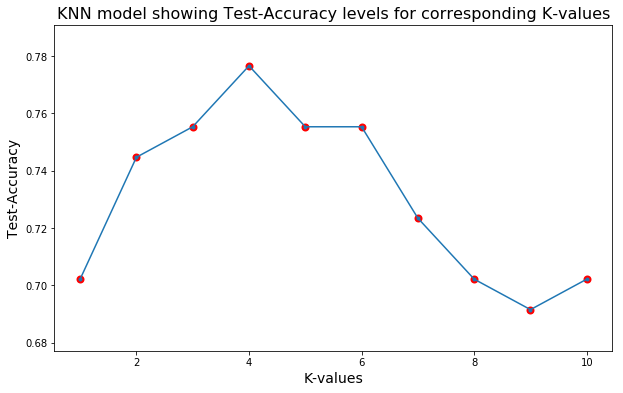

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
u = list(accuracy_dict.keys())
v = list(accuracy_dict.values())
plt.scatter(x=u, y=v, linewidths=2, edgecolor='red')
plt.plot(u,v)
plt.xlabel('K-values', fontsize=14)
plt.ylabel('Test-Accuracy', fontsize=14)
plt.title('KNN model showing Test-Accuracy levels for corresponding K-values', fontsize=16)
plt.show()

#### Therefore The best Test accuracy Score for KNN model is  = 0.7765 and The best k = 4

# Decision Tree

First let's import Decision tree classifier from Sklearn

In [38]:
from sklearn.tree import DecisionTreeClassifier

Let's view our X and y variables

In [39]:
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [40]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

Let's confirm the shapes of our variables

In [41]:
print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (252, 8)
X_test shape is (94, 8)
y_train shape is (252,)
y_test shape is (94,)


Let's print out the first five rows of X and y

In [42]:
print('X_train', X_train[:5])
print()
print('y_train', y_train[:5])

X_train [[-1.31458942 -0.95911111  0.17588281  2.37778177  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.17588281 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.50752015 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-5.89052444 -1.96168647 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]

y_train 115    0
16     0
309    1
17     0
8      0
Name: loan_status, dtype: int64


Next let's define a simple method that takes in our parameters and creates a model with the best test accuracy

In [43]:
accuracy_dict={}
def decision_tree(max_depth, X_train, y_train, X_test, y_test):
    """Method takes max_depth an int, and X_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best max_depth value, from 1 to max_depth, and its best test_accuracy score"""
    
    for i in range(1, max_depth+1):
        # Let's instantiate a model
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        # Let's train the model
        decision_model.fit(X_train, y_train)
        # Let's make prediction on the test data
        y_hat = decision_model.predict(X_test)
        # Let's measure accuracy of predictions on test data
        test_acc = round(metrics.accuracy_score(y_test, y_hat),2)
        accuracy_dict[i] = test_acc
        
    key_max_acc = [0,0]
    for key, value in accuracy_dict.items():
        if value > key_max_acc[1]:
            key_max_acc[0] = key
            key_max_acc[1] = value
        
    return key_max_acc 

In [44]:
decision_tree_best_depth_and_acc = decision_tree(10, X_train, y_train, X_test, y_test)

In [45]:
decision_tree_best_depth_and_acc

[1, 0.76000000000000001]

In [46]:
decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = 1)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Plotting the various max_depth values and corresponding acc scores from 1 to 10. This shows max_depth=1 as the best value for highest test accuracy score

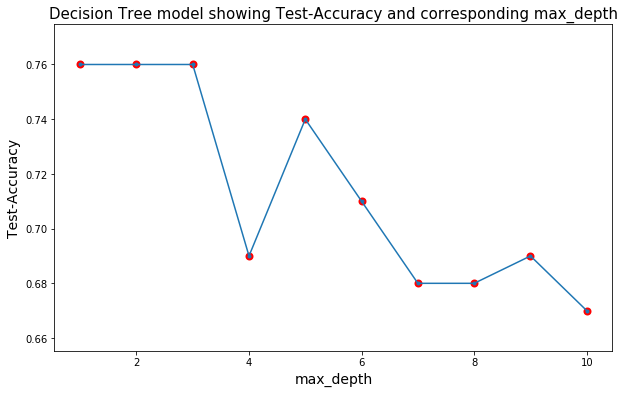

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
u = list(accuracy_dict.keys())
v = list(accuracy_dict.values())
plt.scatter(x=u, y=v, linewidths=2, edgecolor='red')
plt.plot(u,v)
plt.xlabel('max_depth', fontsize=14)
plt.ylabel('Test-Accuracy', fontsize=14)
plt.title('Decision Tree model showing Test-Accuracy and corresponding max_depth', fontsize=15)
plt.show()

#### Therefore The best Test accuracy Score for Decision_tree model is = 0.76 and the best max_depth is 1

# Support Vector Machine

First let's import SVM classifier from Sklearn

In [48]:
from sklearn import svm

Next let's confirm our X and y variables shape and view first 5 rows

In [49]:
print('X_train shape is:',X_train.shape)
print('X_test shape is:',X_test.shape)
print('y_train shape is:',y_train.shape)
print('y_test shape is:',X_test.shape)

X_train shape is: (252, 8)
X_test shape is: (94, 8)
y_train shape is: (252,)
y_test shape is: (94, 8)


In [50]:
# Let's just view first 5 rows of X_train and y_train

print('X_train\n',X_train[:5])
print()
print('y_train\n',y_train[:5])

X_train
 [[-1.31458942 -0.95911111  0.17588281  2.37778177  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.17588281 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.50752015 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-5.89052444 -1.96168647 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]

y_train
 115    0
16     0
309    1
17     0
8      0
Name: loan_status, dtype: int64


Now let's instantiate the SVM model and pass in the kernel parameter<br>
Remember kernel could be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’.<br>
I choose sigmoid first but will try them all to compare results

Now let's define a simple method that will compile and predict our data using the svm model and also compare accuracy based on the kernel type

In [51]:
def svm_classifier(X_train, y_train, X_test, y_test):
    """Method takes X_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best Kernel value, and its test_accuracy score"""
    
    kernels = ['linear','poly','rbf','sigmoid']
    acc = []
    for i in kernels:
        svm_model = svm.SVC(kernel=i)
        # Let's train the model
        svm_model.fit(X_train, y_train)
        # let's mae a prediction on test data
        y_hat = svm_model.predict(X_test)
        # Let's measure accuracy on test data prediction
        test_acc = metrics.accuracy_score(y_test, y_hat)
        print(i,test_acc)
        acc.append(test_acc)
    j = acc.index(max(acc))
    return [kernels[j], round(max(acc),2)] 

In [52]:
best_kernel_max_acc = svm_classifier(X_train, y_train, X_test, y_test)

linear 0.755319148936
poly 0.744680851064
rbf 0.776595744681
sigmoid 0.691489361702


In [53]:
best_kernel_max_acc

['rbf', 0.78000000000000003]

In [54]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Therefore the best kernel for svm model is the linear kernel and the best test accuracy is 0.78

# Logistic Regression

As usual, let's first import The LinearRegression Classifier for this exercise

In [55]:
from sklearn.linear_model import LogisticRegression

Let's confirm the shapes and few rows of our Training and Testing sets

In [56]:
print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (252, 8)
X_test shape is (94, 8)
y_train shape is (252,)
y_test shape is (94,)


In [57]:
# Let's just view first 5 rows of X_train and y_train

print('X_train\n',X_train[:5])
print()
print('y_train\n',y_train[:5])

X_train
 [[-1.31458942 -0.95911111  0.17588281  2.37778177  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.17588281 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.50752015 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [-5.89052444 -1.96168647 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]

y_train
 115    0
16     0
309    1
17     0
8      0
Name: loan_status, dtype: int64


Now let's define a simple method that will compile and predict our data using the LogisticRegression model <br>and also compare accuracy based on the common numerical optimizers available, such as ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

In [58]:
def logistic_regression_classifier(X_train, y_train, X_test, y_test):
    """Method takes X_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best Kernel value, and its test_accuracy score"""
    
    solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
    acc = []
    for i in solvers:
        # Let's instantiate and train the model in one line
        logistic_model = LogisticRegression(C=0.01, solver=i).fit(X_train,y_train)
        # Let's make a prediction on test data
        y_hat = logistic_model.predict(X_test)
        # let's measure accuracy on test data prediction
        test_acc = metrics.accuracy_score(y_test, y_hat)
        print(i,test_acc)
        acc.append(test_acc)
    j = acc.index(max(acc))
    return [solvers[j], round(max(acc),2)] 

In [59]:
best_logistic_solver_and_acc = logistic_regression_classifier(X_train, y_train, X_test, y_test)

newton-cg 0.755319148936
lbfgs 0.755319148936
liblinear 0.712765957447
sag 0.755319148936
saga 0.755319148936


In [60]:
best_logistic_solver_and_acc

['newton-cg', 0.76000000000000001]

In [61]:
logistic_model = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

We can see that four out of five solvers:- newton-cg, lbfgs, sag, saga all output exact same accuracy, <br>so we choose newton-cg since its first on the list.<br>
##### Therefore The best accuracy is 0.76 and the best solver for logistic regression is newton-cg

# Model Evaluation using Test set

In [62]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [63]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-22 04:30:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-22 04:30:52 (634 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [64]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


let's clean test data remove the first two unnnamed columns

In [65]:
test_df = test_df.iloc[:,2:]

In [66]:
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [67]:
# Let's check the shape
test_df.shape

(54, 8)

Let's convert categorical to numeric data

In [68]:
test_df.loan_status.replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1],inplace=True)

In [69]:
test_df.Gender.replace(to_replace=['male','female'],value=[0,1],inplace=True)

In [70]:
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1000,30,9/8/2016,10/7/2016,50,Bechalor,1
1,0,300,7,9/9/2016,9/15/2016,35,Master or Above,0
2,0,1000,30,9/10/2016,10/9/2016,43,High School or Below,1
3,0,1000,30,9/10/2016,10/9/2016,26,college,0
4,0,800,15,9/11/2016,9/25/2016,29,Bechalor,0


In [71]:
# Lets investigate the relationship between education and loan status

test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              1.000000
High School or Below  0              0.523810
                      1              0.476190
Master or Above       0              1.000000
college               0              0.826087
                      1              0.173913
Name: loan_status, dtype: float64

In [72]:
# Let's convert date to date-time-object like we did in loan_train_data

test_df['dayofweek'] = df['effective_date'].dt.dayofweek

In [73]:
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,1000,30,9/8/2016,10/7/2016,50,Bechalor,1,3
1,0,300,7,9/9/2016,9/15/2016,35,Master or Above,0,3
2,0,1000,30,9/10/2016,10/9/2016,43,High School or Below,1,3
3,0,1000,30,9/10/2016,10/9/2016,26,college,0,4
4,0,800,15,9/11/2016,9/25/2016,29,Bechalor,0,4


In [74]:
# Let's define the weekend and day of week variables as we did before

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,9/8/2016,10/7/2016,50,Bechalor,1,3,0
1,0,300,7,9/9/2016,9/15/2016,35,Master or Above,0,3,0
2,0,1000,30,9/10/2016,10/9/2016,43,High School or Below,1,3,0
3,0,1000,30,9/10/2016,10/9/2016,26,college,0,4,1
4,0,800,15,9/11/2016,9/25/2016,29,Bechalor,0,4,1


### Defining our Testing Data feature set 

In [75]:
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,0,0,0,1,0
2,1000,30,43,1,0,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


In [76]:
# deleting MasterorAbove columnlike we did before

del(Feature['Master or Above'])

In [77]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [78]:
# Checking for any NaN values

Feature.isna().sum()

Principal               0
terms                   0
age                     0
Gender                  0
weekend                 0
Bechalor                0
High School or Below    0
college                 0
dtype: int64

### Normalizing our Test Data predictor variables

In [79]:
X = Feature
X_Test_Train= preprocessing.StandardScaler().fit(X).transform(X)
X_Test_Train[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

### Defining our Target variable for the Test data

In [80]:
Y_Test_True = test_df.loan_status
Y_Test_True[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [81]:
print('X_Test_Train shape is',X_Test_Train.shape)
print('Y_Test_True shape is',Y_Test_True.shape)

X_Test_Train shape is (54, 8)
Y_Test_True shape is (54,)


### Models Prediction on Test Data

knn_classifier_model

In [82]:
knn_yhat = knn_model.predict(X_Test_Train)

decision_tree_model

In [83]:
decision_yhat = decision_model.predict(X_Test_Train)

logistic_regression_model 

In [84]:
logistic_yhat = logistic_model.predict(X_Test_Train)

svm_classifier_model

In [85]:
svm_yhat = svm_model.predict(X_Test_Train)

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

In [86]:
Report={'Algorithm':['KNN','Decision_Tree','SVM','Logistic_Regression'],
       'Jaccard':[jaccard_similarity_score(Y_Test_True, knn_yhat),
                  jaccard_similarity_score(Y_Test_True, decision_yhat),
                  jaccard_similarity_score(Y_Test_True, svm_yhat),
                  jaccard_similarity_score(Y_Test_True, logistic_yhat)],
       'F1_Score':[f1_score(Y_Test_True, knn_yhat, average='weighted'),
                   f1_score(Y_Test_True, decision_yhat,average='weighted'),
                   f1_score(Y_Test_True, svm_yhat,average='weighted'),
                   f1_score(Y_Test_True, logistic_yhat,average='weighted')],
       'LogLoss':[log_loss(Y_Test_True, knn_yhat),
                  log_loss(Y_Test_True, decision_yhat),
                  log_loss(Y_Test_True, svm_yhat),
                  log_loss(Y_Test_True, logistic_yhat)],
       'Accuracy':[metrics.accuracy_score(Y_Test_True, knn_yhat),
                   metrics.accuracy_score(Y_Test_True, decision_yhat),
                   metrics.accuracy_score(Y_Test_True, svm_yhat),
                   metrics.accuracy_score(Y_Test_True, logistic_yhat)]}

Report_df = pd.DataFrame(Report, columns=['Algorithm', 'Jaccard','F1_Score','LogLoss','Accuracy'])
Report_df = Report_df.set_index('Algorithm')

# To find the cumulative average performance per model, we sum the total for all models and find the percent for each model 

Report_df['Sum_per_Model'] = Report_df.apply(lambda x: x.Jaccard + x.F1_Score + x.Accuracy - x.LogLoss, axis=1)
Report_df = round(Report_df, 4)
Report_df.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Jaccard,F1_Score,LogLoss,Accuracy,Sum_per_Model
Algorithm,,,,,
KNN,0.6667,0.6152,11.5130,0.6667,-9.5645
Decision_Tree,0.7407,0.6304,8.9545,0.7407,-6.8426
SVM,0.7407,0.6304,8.9545,0.7407,-6.8426
Logistic_Regression,0.7407,0.6304,8.9545,0.7407,-6.8426


### From the above table, the best performing model is tied to the trio of Decision Tree, SVM and Logistic_Regression<br>
### KNN performs slightly worse than the rest

In [1]:
# The code was removed by Watson Studio for sharing.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>